In [5]:
import pandas as pd

births = pd.read_csv('datasets/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [6]:
### Let's add a decade column and take a look at male and female births as a funciton of decade
############ !!!!!!!!! NOTE: !!!!!!!!!!!!! ############
# can use this to calculate decades for crime data

births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


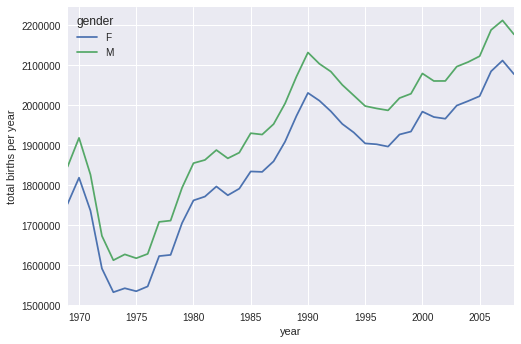

In [7]:
## To visualize the total number of births by  year
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')
# Page 175. male birthrates outnumbered female by 50% ?

In [8]:
############ !!!!!!!!!!!!!! NOTE !!!!!!!!!!!!!!!!!!! #################
'''
CAN USE TO IDENTIFY AND REMOVE OUTLIERS.

with Željko Ivezić, Andrew J.
Connolly, and Alexander Gray: Statistics, Data Mining, and Machine Learning in Astronomy: A Practical
Python Guide for the Analysis of Survey Data (Princeton University Press, 2014).
'''
import numpy as np

### To cut outliers using sigma-clipping operation
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
# This final line is a robust estimate of the sample mean, where the 0.74 comes from the
# interquartile range of a Gaussian distribution.

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [10]:
# set the 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [11]:
# combine the day, month, year to create a date index which allows us to quickly compute the
# weekday corresponding to each row.

## trying to pass as string as '19690101' so that month and day will be of 2 digit length
births.index = pd.to_datetime(10000 * births.year + 
                              100 * births.month + 
                              births.day, format = '%Y%m%d')  ##### ????? UNDERSTAND  ##########

births['dayofweek'] = births.index.dayofweek


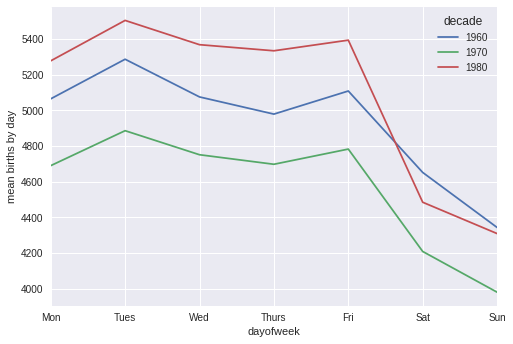

In [12]:
## using this we can plot births by weekday for several decades
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()

plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [13]:
#### plot the mean number of births by the day of the year.

# 1st group the data by month and day separately
births_by_date = births.pivot_table('births', [births.index.month, births.index.day]) # multi-index with month and day

births_by_date.head() # result is a multi-index over months and days.

1  1    4009.225
   2    4247.400
   3    4500.900
   4    4571.350
   5    4603.625
Name: births, dtype: float64

In [14]:
'''
To make this easily plottable, let’s
turn these months and days into a date by associating them with a dummy year vari‐
able (making sure to choose a leap year so February 29th is correctly handled!)
'''

births_by_date.index = [pd.datetime(2012, month, day) for (month,day) in births_by_date.index]
births_by_date.head()

2012-01-01    4009.225
2012-01-02    4247.400
2012-01-03    4500.900
2012-01-04    4571.350
2012-01-05    4603.625
Name: births, dtype: float64

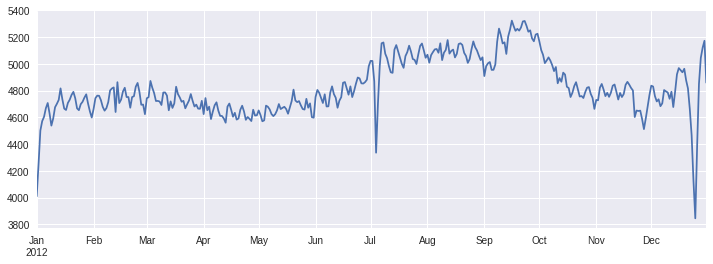

In [15]:
'''
Focusing on the month and day only, we now have a time series reflecting the average
number of births by date of the year.
'''

fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)